In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
G = nx.read_edgelist("book3.csv", delimiter=",", data=[("weight", float)])
G.nodes()

NodeView(('Addam-Marbrand', 'Gyles-Rosby', 'Jaime-Lannister', 'Jalabhar-Xho', 'Joffrey-Baratheon', 'Kevan-Lannister', 'Oberyn-Martell', 'Tyrion-Lannister', 'Varys', 'Aegon-Frey-(son-of-Stevron)', 'Catelyn-Stark', 'Robb-Stark', 'Stevron-Frey', 'Walder-Frey', 'Aegon-I-Targaryen', 'Daenerys-Targaryen', 'Stannis-Baratheon', 'Torrhen-Stark', 'Aegon-Targaryen-(son-of-Rhaegar)', 'Elia-Martell', 'Aemon-Targaryen-(Dragonknight)', 'Aemon-Targaryen-(Maester-Aemon)', 'Alliser-Thorne', 'Clydas', 'Cotter-Pyke', 'Denys-Mallister', 'Donal-Noye', 'Eddison-Tollett', 'Grenn', 'Hobb', 'Janos-Slynt', 'Jeor-Mormont', 'Jon-Snow', 'Mance-Rayder', 'Owen', 'Pypar', 'Robert-Baratheon', 'Samwell-Tarly', 'Wynton-Stout', 'Aerys-II-Targaryen', 'Arthur-Dayne', 'Brienne-of-Tarth', 'Rossart', 'Tywin-Lannister', 'Viserys-Targaryen', 'Aggo', 'Jhogo', 'Rakharo', 'Alayaya', 'Bronn', 'Cersei-Lannister', 'Alerie-Hightower', 'Mace-Tyrell', 'Margaery-Tyrell', 'Alester-Florent', 'Axell-Florent', 'Davos-Seaworth', 'Lamprey', 'Se

In [4]:
c_deg = nx.degree_centrality(G)
c_bet = nx.betweenness_centrality(G)
c_clo = nx.closeness_centrality(G)
c_eig = nx.eigenvector_centrality(G)
max(c_deg.keys(), key = lambda x: c_deg[x])

'Tyrion-Lannister'

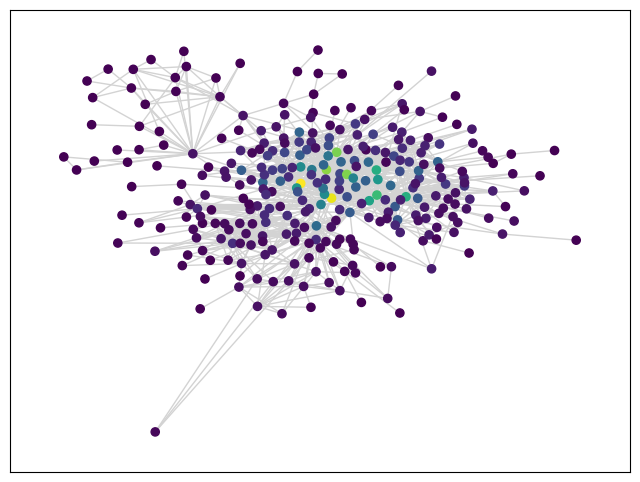

In [9]:
plt.figure(figsize = (8, 6))
colors = [c_eig[node] for node in G.nodes()]
pos = nx.kamada_kawai_layout(G, weight = "weight", scale = 10)
nx.draw_networkx_nodes(G, pos = pos, node_size = 35, node_color=colors, cmap = plt.cm.viridis)
nx.draw_networkx_edges(G, pos = pos, edge_color = "lightgrey")

In [ ]:
communities = nx.community.greedy_modularity_communities(G)

In [23]:
for c in communities:
    print(c)

frozenset({'Brella', 'Alerie-Hightower', 'Lothor-Brune', 'Mace-Tyrell', 'Edric-Storm', 'Meryn-Trant', 'Lollys-Stokeworth', 'Cressen', 'Selyse-Florent', 'Guncer-Sunglass', 'Ellaria-Sand', 'Azor-Ahai', 'Oberyn-Martell', 'Willas-Tyrell', 'Moon-Boy', 'Alester-Florent', 'Axell-Florent', 'Mordane', 'Elia-Martell', 'Myrcella-Baratheon', 'Tommen-Baratheon', 'Khorane-Sathmantes', 'Andrew-Estermont', 'Melisandre', 'Salladhor-Saan', 'Tanda-Stokeworth', 'Jalabhar-Xho', 'Addam-Marbrand', 'Gerald-Gower', 'Aegon-Targaryen-(son-of-Rhaegar)', 'Boros-Blount', 'Patchface', 'Galyeon-of-Cuy', 'High-Septon-(Tyrions)', 'Davos-Seaworth', 'Frenken', 'Symon-Silver-Tongue', 'Loras-Tyrell', 'Mandon-Moore', 'Podrick-Payne', 'Mathis-Rowan', 'Lancel-Lannister', 'Joffrey-Baratheon', 'Osmund-Kettleblack', 'Shae', 'Cersei-Lannister', 'Megga-Tyrell', 'Garlan-Tyrell', 'Lamprey', 'Maegor-I-Targaryen', 'Ballabar', 'Bronn', 'Devan-Seaworth', 'Tysha', 'Gyles-Rosby', 'Alayaya', 'Baelor-I-Targaryen', 'Kella', 'Renly-Baratheon'

In [ ]:
r = nx.degree_pearson_correlation_coefficient(G)
print(r)

-0.11180635102944984


In [13]:
k = [G.degree(node) for node in G]
r_null = []
for _ in range(1000):
    G_null = nx.configuration_model(k)
    G_null.remove_edges_from(nx.selfloop_edges(G_null))
    r_null.append(nx.degree_pearson_correlation_coefficient(G_null))

In [ ]:
print(r_null) # should be zero


[-0.06930038943594452, -0.07693054498485782, -0.0761679696486921, -0.07444358876161489, 0.007934026880433117, -0.024250891001334547, 0.05031721476241986, -0.05377468517159867, -0.03209599592696412, -0.04982313529928936, -0.03509131273893866, -0.05629988192338072, -0.03522484197888011, -0.028175362459638836, 0.012730541226455767, -0.008729738028813602, 0.017929012362480012, 0.0024614952822535306, -0.04176083677501606, -0.04696667388317512, -0.018001901132829633, -0.029794661717880096, 0.008107697855554949, -0.041697820320318005, -0.02361810806603469, -0.009399120014049168, -0.020671300236825667, -0.028055394439152927, -0.011829001096867787, -0.018373434546527054, -0.03121387888522298, 0.03648181205164147, -0.03543374161084034, -0.02901034919056444, 0.007418325946225015, -0.080484763669528, -0.03263094715914059, 0.022875587800866, -0.0539589138355325, -0.028590960530020172, -0.0018149818528380682, -0.06906416866224865, -0.0003550911843085208, 0.002249748114098389, 0.01797237352105855, -0

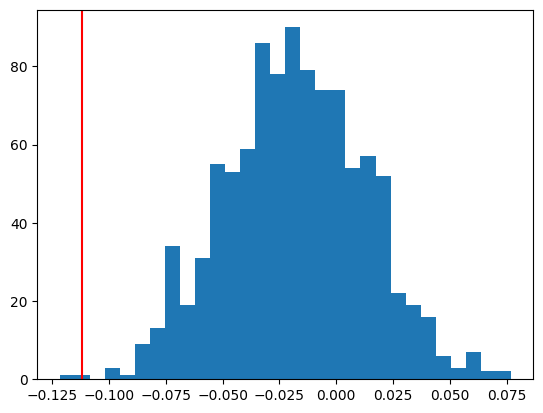

In [16]:
plt.hist(r_null, bins = 30)
plt.axvline(r, color = 'red')

In [ ]:
k_max = max(k)
